In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [46]:
# Paso 1: Crear un dataset simulado
np.random.seed(42)
colors = ['Rojo', 'Azul', 'Verde', 'Negro', 'Blanco']
data = {
    'Fecha': pd.date_range(start='2023-01-01', periods=200, freq='D'),
    'Precio_Camiseta': np.random.uniform(10, 50, 200),
    'Precio_Pantalones': np.random.uniform(20, 70, 200),
    'Precio_Chaqueta': np.random.uniform(30, 100, 200),
    'Descuento_Camiseta': np.random.uniform(0, 0.5, 200),
    'Descuento_Pantalones': np.random.uniform(0, 0.5, 200),
    'Descuento_Chaqueta': np.random.uniform(0, 0.5, 200),
    'Unidades_Vendidas_Camiseta': np.random.poisson(20, 200),
    #'Unidades_Vendidas_Pantalones': np.random.poisson(15, 200),
    'Unidades_Vendidas_Pantalones': np.random.poisson(20, 200),
    #'Unidades_Vendidas_Chaqueta': np.random.poisson(10, 200),
    'Unidades_Vendidas_Chaqueta': np.random.poisson(20, 200),
    'Color_Camiseta': np.random.choice(colors, 200),
    'Color_Pantalones': np.random.choice(colors, 200),
    'Color_Chaqueta': np.random.choice(colors, 200)
}

df = pd.DataFrame(data)
df.head()

,Fecha,Precio_Camiseta,Precio_Pantalones,Precio_Chaqueta,Descuento_Camiseta,Descuento_Pantalones,Descuento_Chaqueta,Unidades_Vendidas_Camiseta,Unidades_Vendidas_Pantalones,Unidades_Vendidas_Chaqueta,Color_Camiseta,Color_Pantalones,Color_Chaqueta
0,2023-01-01,24.981605,52.101582,37.218671,0.084468,0.353619,0.092566,24,22,26,Verde,Blanco,Rojo
1,2023-01-02,48.028572,24.206998,93.178703,0.139295,0.076270,0.270950,20,22,23,Blanco,Negro,Azul
2,2023-01-03,39.279758,28.081436,65.367666,0.088505,0.288144,0.436473,22,15,13,Rojo,Azul,Blanco
3,2023-01-04,33.946339,64.927709,87.852023,0.044351,0.303358,0.366112,19,24,17,Blanco,Blanco,Azul
4,2023-01-05,16.240746,50.321453,52.403472,0.060318,0.212065,0.403281,15,11,17,Azul,Blanco,Rojo


In [47]:
df.shape

(200, 13)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Fecha                         200 non-null    datetime64[ns]
 1   Precio_Camiseta               200 non-null    float64       
 2   Precio_Pantalones             200 non-null    float64       
 3   Precio_Chaqueta               200 non-null    float64       
 4   Descuento_Camiseta            200 non-null    float64       
 5   Descuento_Pantalones          200 non-null    float64       
 6   Descuento_Chaqueta            200 non-null    float64       
 7   Unidades_Vendidas_Camiseta    200 non-null    int32         
 8   Unidades_Vendidas_Pantalones  200 non-null    int32         
 9   Unidades_Vendidas_Chaqueta    200 non-null    int32         
 10  Color_Camiseta                200 non-null    object        
 11  Color_Pantalones              20

In [49]:
df.isnull().sum()/len(df)

Fecha                           0.0
Precio_Camiseta                 0.0
Precio_Pantalones               0.0
Precio_Chaqueta                 0.0
Descuento_Camiseta              0.0
Descuento_Pantalones            0.0
Descuento_Chaqueta              0.0
Unidades_Vendidas_Camiseta      0.0
Unidades_Vendidas_Pantalones    0.0
Unidades_Vendidas_Chaqueta      0.0
Color_Camiseta                  0.0
Color_Pantalones                0.0
Color_Chaqueta                  0.0
dtype: float64

In [50]:
df.duplicated().sum()

0

In [51]:
cols = df.select_dtypes(include = "number").columns
cols

Index(['Precio_Camiseta', 'Precio_Pantalones', 'Precio_Chaqueta',
       'Descuento_Camiseta', 'Descuento_Pantalones', 'Descuento_Chaqueta',
       'Unidades_Vendidas_Camiseta', 'Unidades_Vendidas_Pantalones',
       'Unidades_Vendidas_Chaqueta'],
      dtype='object')

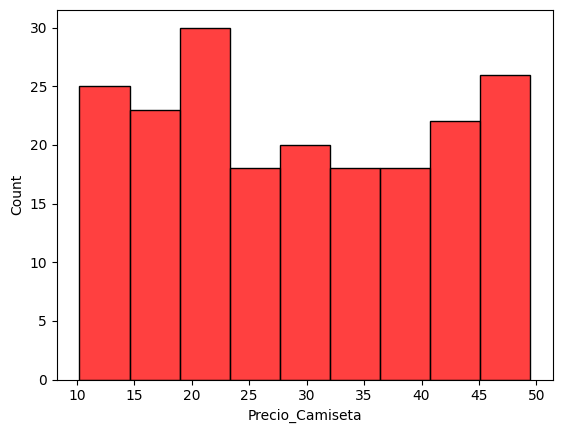

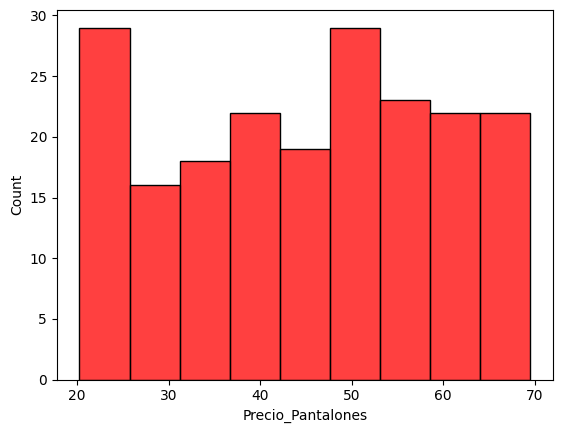

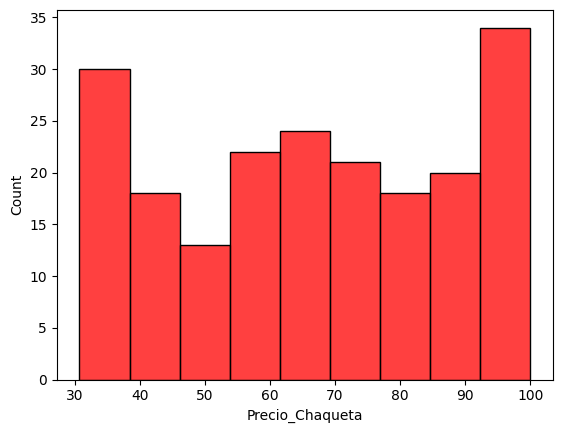

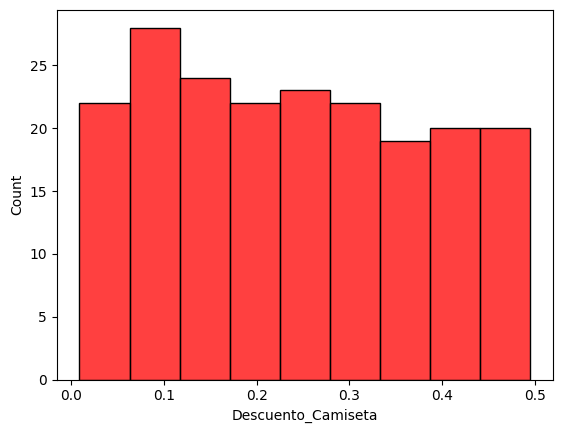

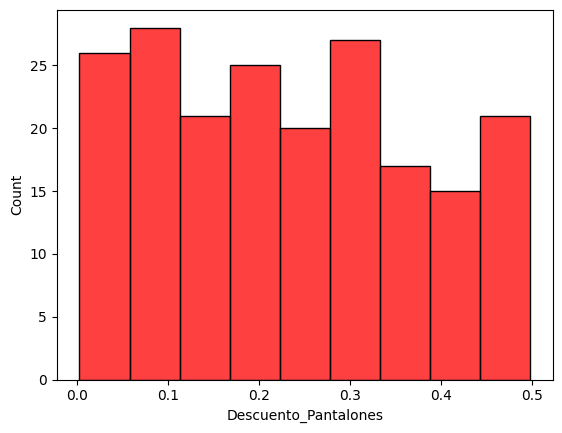

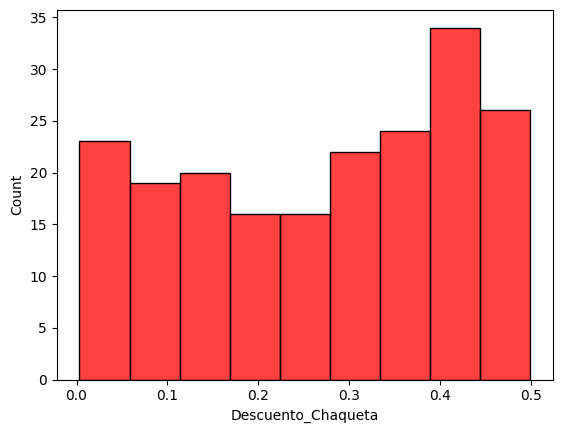

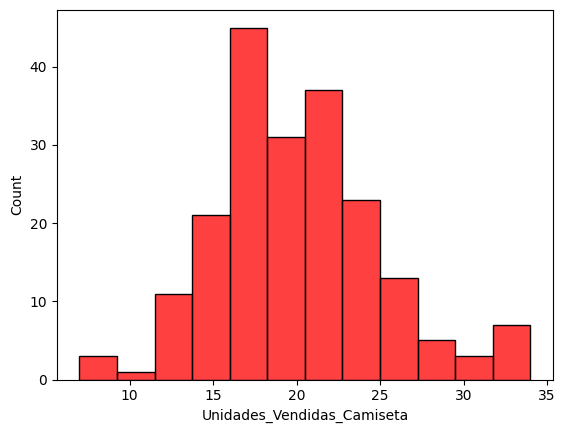

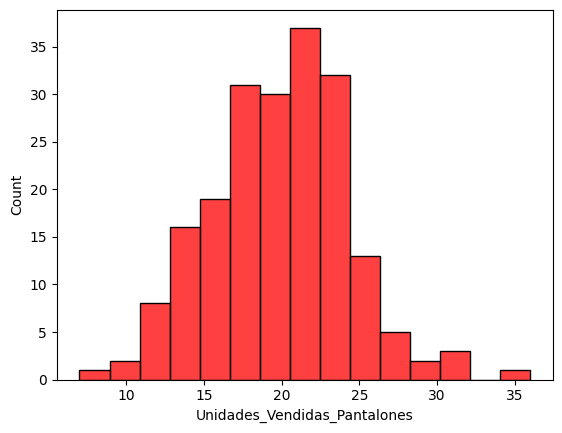

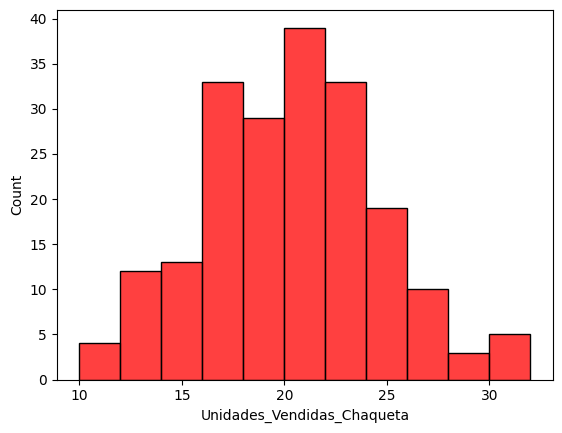

In [52]:
for i in cols:
    sns.histplot(data = df, x = i, color = "red")
    plt.show()

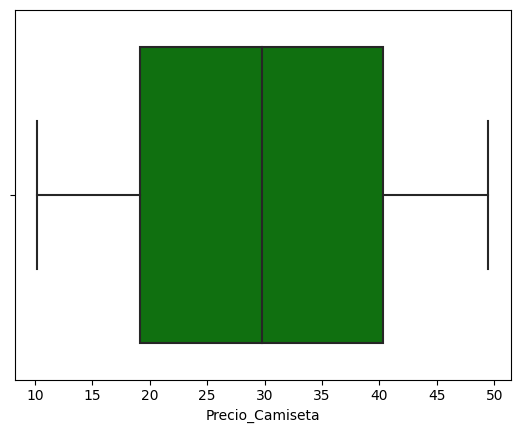

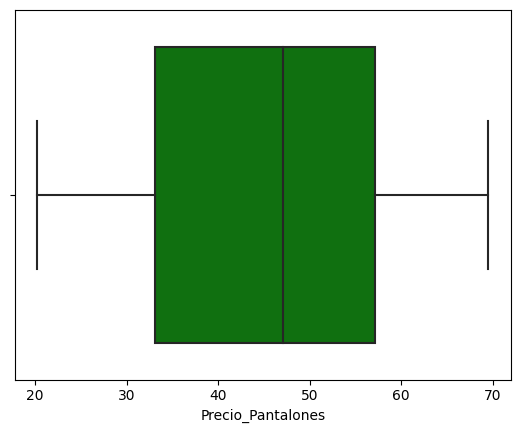

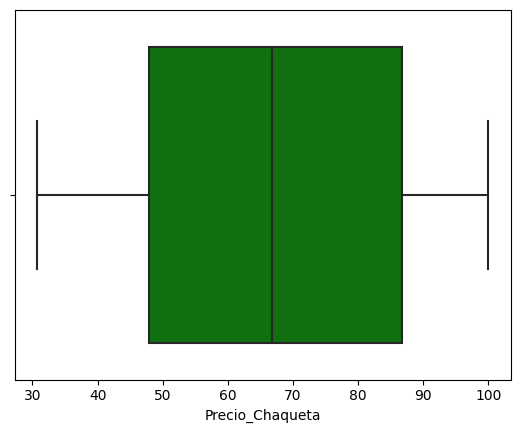

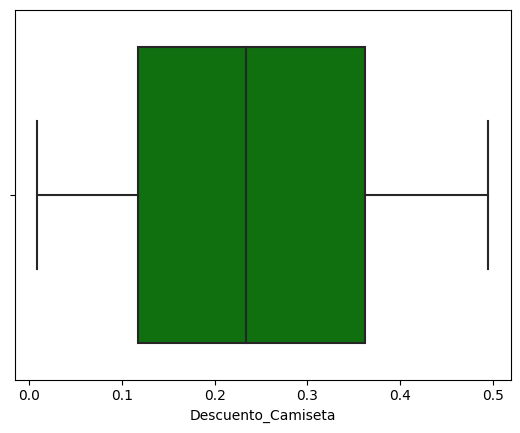

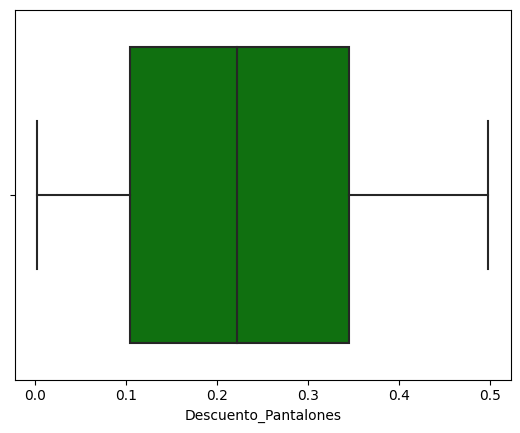

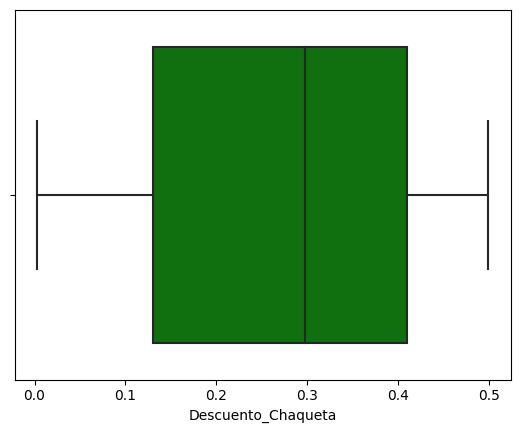

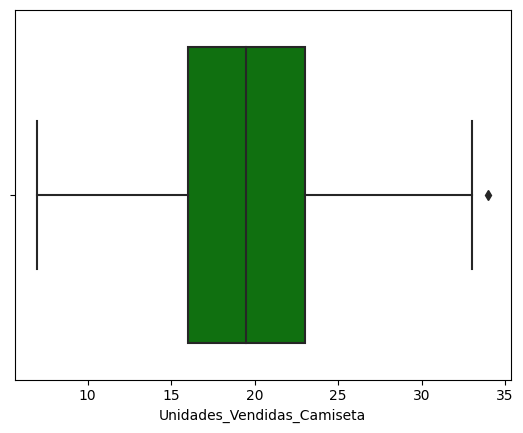

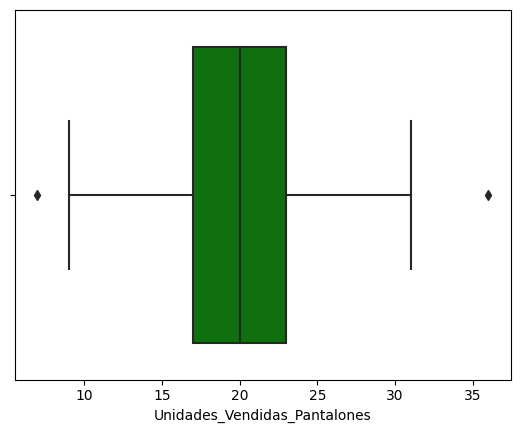

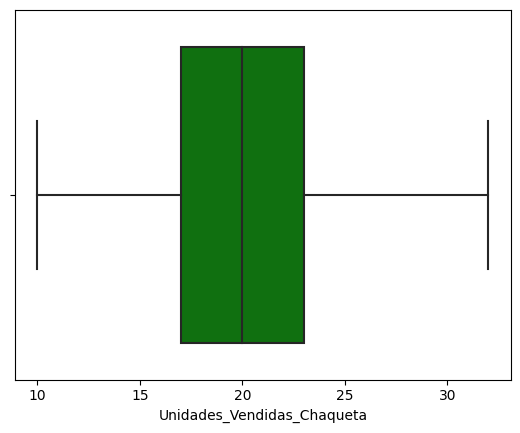

In [54]:
for i in cols:
    sns.boxplot(data = df, x = i, color = "green")
    plt.show()

treatment

In [55]:
def wisker(col):
    q1, q3 = np.percentile(col, [25,75])
    iqr = q3 - q1
    lw = q1 - (1.5)*iqr
    uw = q3 + (1.5)*iqr
    return lw, uw

In [56]:
for i in df.select_dtypes(include = "number").columns:
    lw, uw = wisker(df[i])
    df[i] = np.where(df[i]<lw, lw, df[i])
    df[i] = np.where(df[i]>uw, uw, df[i])

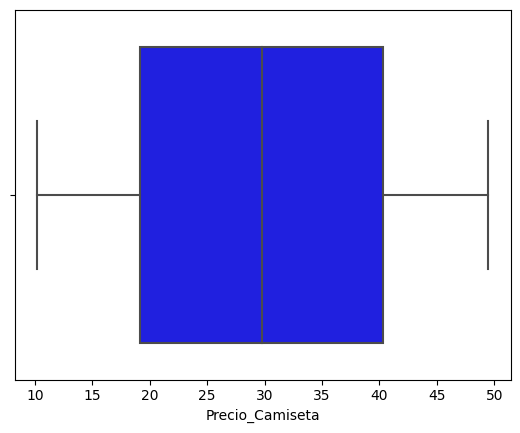

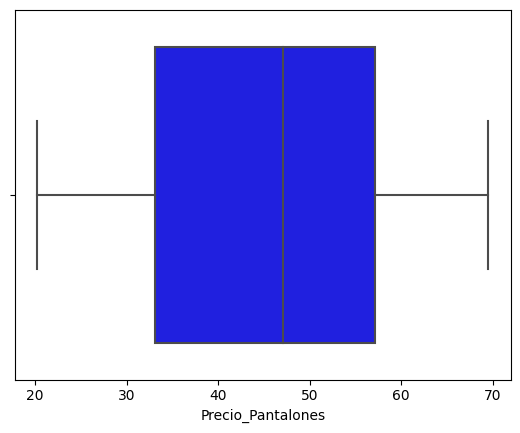

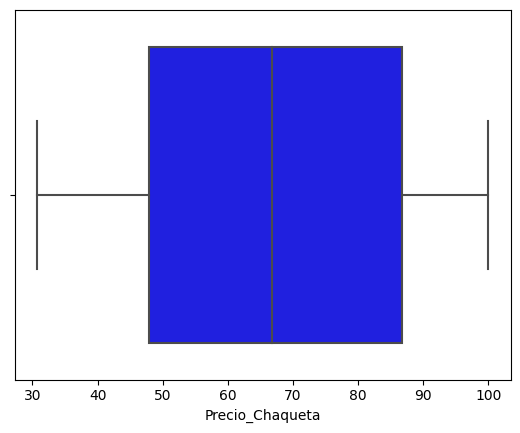

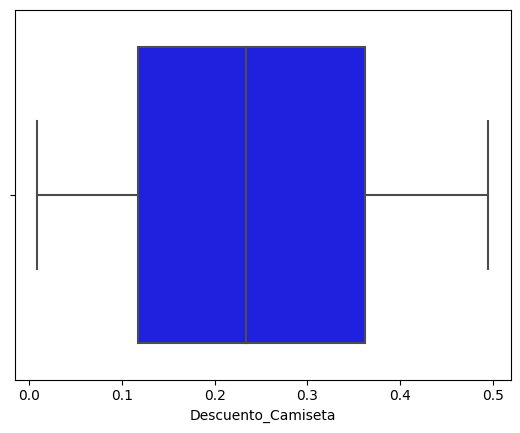

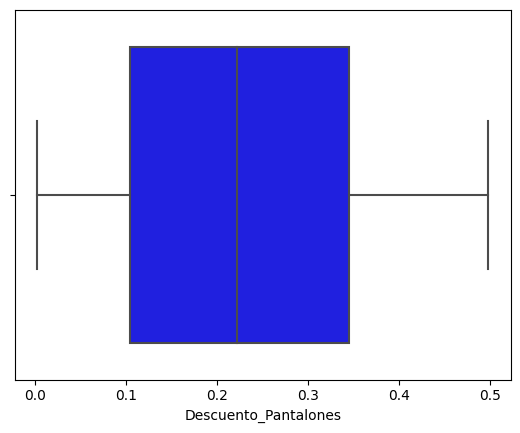

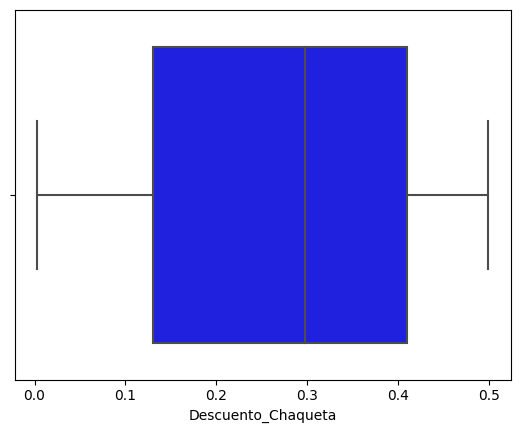

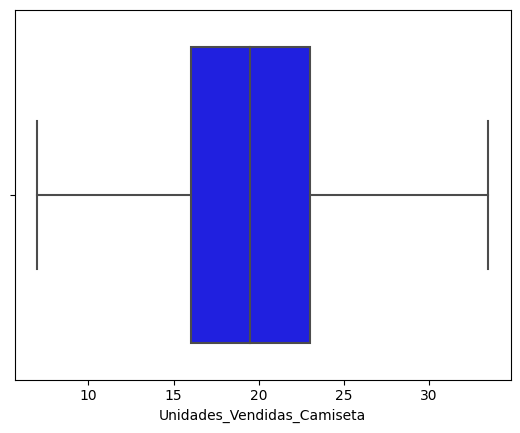

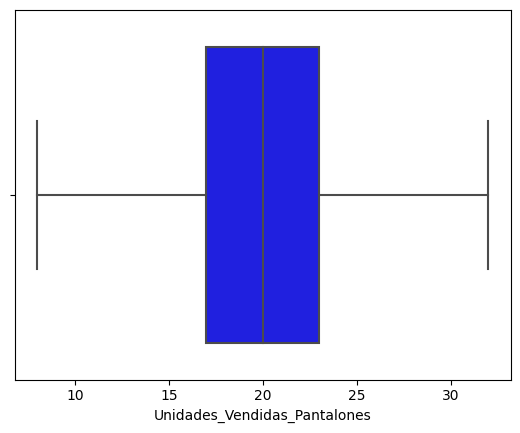

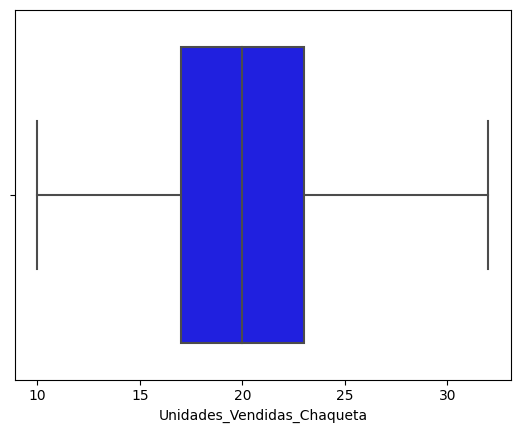

In [57]:
for i in df.select_dtypes(include = "number").columns:
    sns.boxplot(data = df, x = i, color = "blue")
    plt.show()

In [58]:
# Determinar la prenda que se vendió más
df['Prenda_Mas_Vendida'] = df[['Unidades_Vendidas_Camiseta', 'Unidades_Vendidas_Pantalones', 'Unidades_Vendidas_Chaqueta']].idxmax(axis=1)
df.head()

,Fecha,Precio_Camiseta,Precio_Pantalones,Precio_Chaqueta,Descuento_Camiseta,Descuento_Pantalones,Descuento_Chaqueta,Unidades_Vendidas_Camiseta,Unidades_Vendidas_Pantalones,Unidades_Vendidas_Chaqueta,Color_Camiseta,Color_Pantalones,Color_Chaqueta,Prenda_Mas_Vendida
0,2023-01-01,24.981605,52.101582,37.218671,0.084468,0.353619,0.092566,24.0,22.0,26.0,Verde,Blanco,Rojo,Unidades_Vendidas_Chaqueta
1,2023-01-02,48.028572,24.206998,93.178703,0.139295,0.076270,0.270950,20.0,22.0,23.0,Blanco,Negro,Azul,Unidades_Vendidas_Chaqueta
2,2023-01-03,39.279758,28.081436,65.367666,0.088505,0.288144,0.436473,22.0,15.0,13.0,Rojo,Azul,Blanco,Unidades_Vendidas_Camiseta
3,2023-01-04,33.946339,64.927709,87.852023,0.044351,0.303358,0.366112,19.0,24.0,17.0,Blanco,Blanco,Azul,Unidades_Vendidas_Pantalones
4,2023-01-05,16.240746,50.321453,52.403472,0.060318,0.212065,0.403281,15.0,11.0,17.0,Azul,Blanco,Rojo,Unidades_Vendidas_Chaqueta


In [59]:
df['Prenda_Mas_Vendida'] = df['Prenda_Mas_Vendida'].apply(lambda x: x.split('_')[2])

In [60]:
df.head()

,Fecha,Precio_Camiseta,Precio_Pantalones,Precio_Chaqueta,Descuento_Camiseta,Descuento_Pantalones,Descuento_Chaqueta,Unidades_Vendidas_Camiseta,Unidades_Vendidas_Pantalones,Unidades_Vendidas_Chaqueta,Color_Camiseta,Color_Pantalones,Color_Chaqueta,Prenda_Mas_Vendida
0,2023-01-01,24.981605,52.101582,37.218671,0.084468,0.353619,0.092566,24.0,22.0,26.0,Verde,Blanco,Rojo,Chaqueta
1,2023-01-02,48.028572,24.206998,93.178703,0.139295,0.076270,0.270950,20.0,22.0,23.0,Blanco,Negro,Azul,Chaqueta
2,2023-01-03,39.279758,28.081436,65.367666,0.088505,0.288144,0.436473,22.0,15.0,13.0,Rojo,Azul,Blanco,Camiseta
3,2023-01-04,33.946339,64.927709,87.852023,0.044351,0.303358,0.366112,19.0,24.0,17.0,Blanco,Blanco,Azul,Pantalones
4,2023-01-05,16.240746,50.321453,52.403472,0.060318,0.212065,0.403281,15.0,11.0,17.0,Azul,Blanco,Rojo,Chaqueta


Preprocessing

In [61]:
df['Mes'] = df['Fecha'].dt.month
df['Día'] = df['Fecha'].dt.day
df['Día_Semana'] = df['Fecha'].dt.dayofweek
df.drop(columns=['Fecha'], inplace=True)

In [62]:
df.head()

,Precio_Camiseta,Precio_Pantalones,Precio_Chaqueta,Descuento_Camiseta,Descuento_Pantalones,Descuento_Chaqueta,Unidades_Vendidas_Camiseta,Unidades_Vendidas_Pantalones,Unidades_Vendidas_Chaqueta,Color_Camiseta,Color_Pantalones,Color_Chaqueta,Prenda_Mas_Vendida,Mes,Día,Día_Semana
0,24.981605,52.101582,37.218671,0.084468,0.353619,0.092566,24.0,22.0,26.0,Verde,Blanco,Rojo,Chaqueta,1,1,6
1,48.028572,24.206998,93.178703,0.139295,0.076270,0.270950,20.0,22.0,23.0,Blanco,Negro,Azul,Chaqueta,1,2,0
2,39.279758,28.081436,65.367666,0.088505,0.288144,0.436473,22.0,15.0,13.0,Rojo,Azul,Blanco,Camiseta,1,3,1
3,33.946339,64.927709,87.852023,0.044351,0.303358,0.366112,19.0,24.0,17.0,Blanco,Blanco,Azul,Pantalones,1,4,2
4,16.240746,50.321453,52.403472,0.060318,0.212065,0.403281,15.0,11.0,17.0,Azul,Blanco,Rojo,Chaqueta,1,5,3


In [63]:
# Convertir las variables categóricas a variables dummy
df = pd.get_dummies(df, columns=['Color_Camiseta', 'Color_Pantalones', 'Color_Chaqueta'], drop_first=True)
df.head()

,Precio_Camiseta,Precio_Pantalones,Precio_Chaqueta,Descuento_Camiseta,Descuento_Pantalones,Descuento_Chaqueta,Unidades_Vendidas_Camiseta,Unidades_Vendidas_Pantalones,Unidades_Vendidas_Chaqueta,Prenda_Mas_Vendida,...,Color_Camiseta_Rojo,Color_Camiseta_Verde,Color_Pantalones_Blanco,Color_Pantalones_Negro,Color_Pantalones_Rojo,Color_Pantalones_Verde,Color_Chaqueta_Blanco,Color_Chaqueta_Negro,Color_Chaqueta_Rojo,Color_Chaqueta_Verde
0,24.981605,52.101582,37.218671,0.084468,0.353619,0.092566,24.0,22.0,26.0,Chaqueta,...,False,True,True,False,False,False,False,False,True,False
1,48.028572,24.206998,93.178703,0.139295,0.076270,0.270950,20.0,22.0,23.0,Chaqueta,...,False,False,False,True,False,False,False,False,False,False
2,39.279758,28.081436,65.367666,0.088505,0.288144,0.436473,22.0,15.0,13.0,Camiseta,...,True,False,False,False,False,False,True,False,False,False
3,33.946339,64.927709,87.852023,0.044351,0.303358,0.366112,19.0,24.0,17.0,Pantalones,...,False,False,True,False,False,False,False,False,False,False
4,16.240746,50.321453,52.403472,0.060318,0.212065,0.403281,15.0,11.0,17.0,Chaqueta,...,False,False,True,False,False,False,False,False,True,False


In [65]:
X = df.drop(columns=['Prenda_Mas_Vendida'])
y = df['Prenda_Mas_Vendida']

In [66]:
X.head()

,Precio_Camiseta,Precio_Pantalones,Precio_Chaqueta,Descuento_Camiseta,Descuento_Pantalones,Descuento_Chaqueta,Unidades_Vendidas_Camiseta,Unidades_Vendidas_Pantalones,Unidades_Vendidas_Chaqueta,Mes,...,Color_Camiseta_Rojo,Color_Camiseta_Verde,Color_Pantalones_Blanco,Color_Pantalones_Negro,Color_Pantalones_Rojo,Color_Pantalones_Verde,Color_Chaqueta_Blanco,Color_Chaqueta_Negro,Color_Chaqueta_Rojo,Color_Chaqueta_Verde
0,24.981605,52.101582,37.218671,0.084468,0.353619,0.092566,24.0,22.0,26.0,1,...,False,True,True,False,False,False,False,False,True,False
1,48.028572,24.206998,93.178703,0.139295,0.076270,0.270950,20.0,22.0,23.0,1,...,False,False,False,True,False,False,False,False,False,False
2,39.279758,28.081436,65.367666,0.088505,0.288144,0.436473,22.0,15.0,13.0,1,...,True,False,False,False,False,False,True,False,False,False
3,33.946339,64.927709,87.852023,0.044351,0.303358,0.366112,19.0,24.0,17.0,1,...,False,False,True,False,False,False,False,False,False,False
4,16.240746,50.321453,52.403472,0.060318,0.212065,0.403281,15.0,11.0,17.0,1,...,False,False,True,False,False,False,False,False,True,False


In [67]:
y.head()

0      Chaqueta
1      Chaqueta
2      Camiseta
3    Pantalones
4      Chaqueta
Name: Prenda_Mas_Vendida, dtype: object

In [68]:
# Codificar la variable objetivo
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y

array([1, 1, 0, 2, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 2,
       2, 1, 1, 2, 2, 1, 2, 0, 1, 2, 0, 2, 1, 1, 1, 2, 0, 0, 1, 0, 0, 1,
       0, 1, 2, 2, 2, 0, 2, 0, 1, 2, 1, 2, 0, 2, 0, 1, 2, 0, 1, 0, 2, 0,
       2, 0, 0, 2, 1, 1, 0, 1, 0, 0, 1, 2, 2, 2, 0, 1, 0, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 1, 1, 1, 0, 2, 0, 0, 0, 0, 0, 2, 1, 2, 1, 0, 0, 0,
       0, 1, 0, 2, 0, 2, 2, 2, 2, 1, 1, 2, 1, 0, 1, 0, 2, 1, 1, 2, 1, 0,
       0, 2, 1, 1, 2, 1, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 1, 0, 2, 1, 0,
       2, 1, 1, 2, 2, 2, 1, 2, 0, 0, 1, 2, 1, 2, 1, 2, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 2, 1, 1, 0, 0, 2, 0, 0, 1, 2, 1, 0, 0, 2, 1, 0, 0,
       1, 2])

In [69]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.37213971,  0.47099449, -1.36213713, ..., -0.46852129,
         1.91080161, -0.53881591],
       [ 1.58661523, -1.43784301,  1.24577762, ..., -0.46852129,
        -0.52334057, -0.53881591],
       [ 0.84305607, -1.17271371, -0.0503048 , ..., -0.46852129,
        -0.52334057, -0.53881591],
       ...,
       [ 1.40438355, -0.25791796, -1.13640443, ..., -0.46852129,
        -0.52334057, -0.53881591],
       [ 1.37030664,  0.84339074, -1.07126064, ..., -0.46852129,
         1.91080161, -0.53881591],
       [ 1.00583381,  0.8559539 , -1.56522756, ...,  2.13437475,
        -0.52334057, -0.53881591]])

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 24), (40, 24), (160,), (40,))

Model

In [71]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [72]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 2, 0, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 1, 1,
       2, 1, 0, 2, 1, 0, 0, 0, 1, 1, 2, 0, 0, 1, 1, 1, 0, 1])

Score

In [74]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.775

Predicciones

In [28]:
nuevo_dato = {
    'Precio_Camiseta': [35],
    'Precio_Pantalones': [55],
    'Precio_Chaqueta': [75],
    'Descuento_Camiseta': [0.1],
    'Descuento_Pantalones': [0.2],
    'Descuento_Chaqueta': [0.15],
    'Unidades_Vendidas_Camiseta': [0],
    'Unidades_Vendidas_Pantalones': [0],
    'Unidades_Vendidas_Chaqueta': [0],
    'Mes': [6],
    'Día': [15],
    'Día_Semana': [2],
    'Color_Camiseta_Azul': [0],
    'Color_Camiseta_Negro': [1],
    'Color_Camiseta_Rojo': [0],
    'Color_Camiseta_Verde': [0],
    'Color_Pantalones_Azul': [1],
    'Color_Pantalones_Negro': [0],
    'Color_Pantalones_Rojo': [0],
    'Color_Pantalones_Verde': [0],
    'Color_Chaqueta_Azul': [0],
    'Color_Chaqueta_Negro': [0],
    'Color_Chaqueta_Rojo': [1],
    'Color_Chaqueta_Verde': [0]
}

In [29]:
nuevo_df = pd.DataFrame(nuevo_dato)
nuevo_df

,Precio_Camiseta,Precio_Pantalones,Precio_Chaqueta,Descuento_Camiseta,Descuento_Pantalones,Descuento_Chaqueta,Unidades_Vendidas_Camiseta,Unidades_Vendidas_Pantalones,Unidades_Vendidas_Chaqueta,Mes,...,Color_Camiseta_Rojo,Color_Camiseta_Verde,Color_Pantalones_Azul,Color_Pantalones_Negro,Color_Pantalones_Rojo,Color_Pantalones_Verde,Color_Chaqueta_Azul,Color_Chaqueta_Negro,Color_Chaqueta_Rojo,Color_Chaqueta_Verde
0,35,55,75,0.1,0.2,0.15,0,0,0,6,...,0,0,1,0,0,0,0,0,1,0
